In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\91950\Desktop\cardata.csv")
data.head()

,Index,Make,Size,Color,Category,Condition,Odometer,Doors,Price
0,1,Honda,Medium,White,Medium,Good,35431.0,4,15323
1,2,BMW,Large,Blue,Medium,Old,192714.0,5,19943
2,3,Honda,Medium,White,Expensive,Good,84714.0,4,28343
3,4,Toyota,Medium,White,Medium,Old,154365.0,4,13434
4,5,Nissan,Small,Blue,Medium,Old,181577.0,3,14043


In [3]:
data.isna()

,Index,Make,Size,Color,Category,Condition,Odometer,Doors,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
853,False,False,False,False,False,False,False,False,False
854,False,False,False,False,False,False,False,False,False
855,False,False,False,False,False,False,False,False,False
856,False,False,False,False,False,False,False,False,False


In [4]:
data.isna().sum()

Index        0
Make         0
Size         0
Color        0
Category     0
Condition    0
Odometer     0
Doors        0
Price        0
dtype: int64

In [5]:
data.shape

(858, 9)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.describe()

,Index,Odometer,Doors,Price
count,858.000000,858.000000,858.000000,858.000000
mean,429.500000,132255.042541,4.008159,16154.287879
std,247.827561,67352.093697,0.375664,8559.710916
min,1.000000,10148.000000,3.000000,2796.000000
25%,215.250000,73431.750000,4.000000,9716.000000
50%,429.500000,133069.650000,4.000000,14556.000000
75%,643.750000,191180.000000,4.000000,20870.500000
max,858.000000,249860.000000,5.000000,52458.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      858 non-null    int64  
 1   Make       858 non-null    object 
 2   Size       858 non-null    object 
 3   Color      858 non-null    object 
 4   Category   858 non-null    object 
 5   Condition  858 non-null    object 
 6   Odometer   858 non-null    float64
 7   Doors      858 non-null    int64  
 8   Price      858 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 60.5+ KB


In [9]:
data.head()

,Index,Make,Size,Color,Category,Condition,Odometer,Doors,Price
0,1,Honda,Medium,White,Medium,Good,35431.0,4,15323
1,2,BMW,Large,Blue,Medium,Old,192714.0,5,19943
2,3,Honda,Medium,White,Expensive,Good,84714.0,4,28343
3,4,Toyota,Medium,White,Medium,Old,154365.0,4,13434
4,5,Nissan,Small,Blue,Medium,Old,181577.0,3,14043


In [10]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

,Index,Odometer,Doors,Price
Index,1.000000,0.049509,0.056256,0.065973
Odometer,0.049509,1.000000,-0.030474,-0.406573
Doors,0.056256,-0.030474,1.000000,0.233012
Price,0.065973,-0.406573,0.233012,1.000000


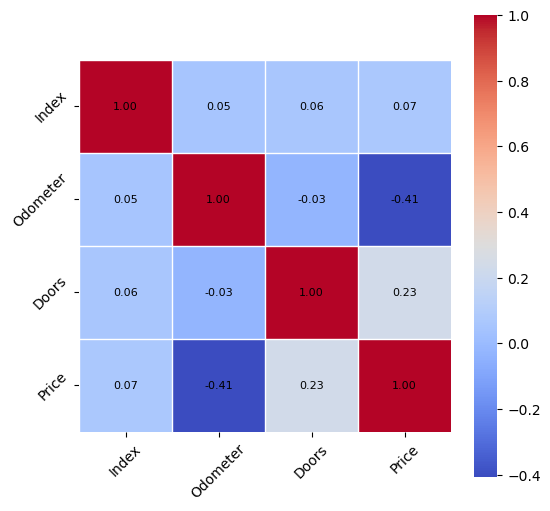

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix,cmap="coolwarm",square=True)
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = f"{correlation_matrix.iloc[i,j]:.2f}"
        plt.text(j+0.5,i+0.5,text,ha="center",va="center",fontsize=8)

for k in range(len(correlation_matrix)):
    plt.axhline(k,color="white",linewidth=1)
    plt.axvline(k,color="white",linewidth=1)
    
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

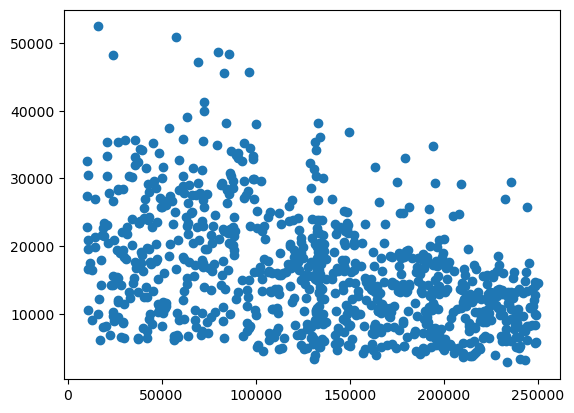

In [12]:
plt.scatter(data["Odometer"],data["Price"])

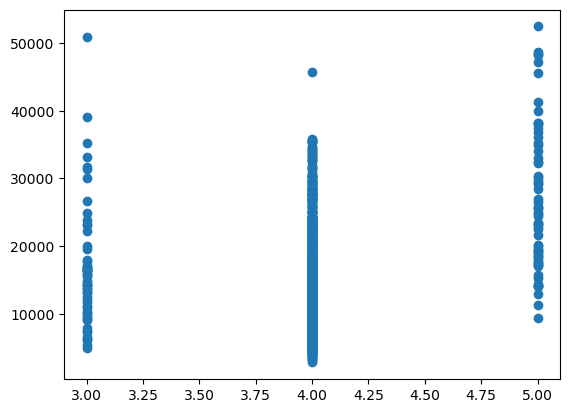

In [13]:
plt.scatter(data["Doors"],data["Price"])

In [14]:
pd.crosstab(data["Doors"],data["Category"])

Category,Cheap,Expensive,Medium
Doors,,,
3,12,14,31
4,213,183,341
5,1,41,22


In [15]:
pd.crosstab(data["Condition"],data["Category"])

Category,Cheap,Expensive,Medium
Condition,,,
Average,55,58,99
Good,45,154,100
Old,126,26,195


In [16]:
pd.crosstab(data["Size"],data["Category"])

Category,Cheap,Expensive,Medium
Size,,,
Large,1,41,22
Medium,196,174,324
Missing,17,9,17
Small,12,14,31


In [17]:
data = data[data["Size"]!="Missing"]
data.head()

,Index,Make,Size,Color,Category,Condition,Odometer,Doors,Price
0,1,Honda,Medium,White,Medium,Good,35431.0,4,15323
1,2,BMW,Large,Blue,Medium,Old,192714.0,5,19943
2,3,Honda,Medium,White,Expensive,Good,84714.0,4,28343
3,4,Toyota,Medium,White,Medium,Old,154365.0,4,13434
4,5,Nissan,Small,Blue,Medium,Old,181577.0,3,14043


In [18]:
pd.crosstab(data["Size"],data["Category"])

Category,Cheap,Expensive,Medium
Size,,,
Large,1,41,22
Medium,196,174,324
Small,12,14,31


In [19]:
data["Size"].unique()

array(['Medium', 'Large', 'Small'], dtype=object)

In [20]:
data["Category"].unique()

array(['Medium', 'Expensive', 'Cheap'], dtype=object)

In [21]:
data["Condition"].unique()

array(['Good', 'Old', 'Average'], dtype=object)

In [22]:
category_mapping = {"Cheap":0,"Medium":1,"Expensive":2}
size_mapping = {"Small":0,"Medium":1,"Expensive":2}
condition_mapping = {"Old":0,"Average":1,"Good":2}

In [23]:
data["Category"] = data["Category"].map(category_mapping)
data["Size"]=data["Size"].map(size_mapping)
data["Condition"] = data["Condition"].map(condition_mapping)

In [24]:
data

,Index,Make,Size,Color,Category,Condition,Odometer,Doors,Price
0,1,Honda,1.0,White,1,2,35431.0,4,15323
1,2,BMW,NaN,Blue,1,0,192714.0,5,19943
2,3,Honda,1.0,White,2,2,84714.0,4,28343
3,4,Toyota,1.0,White,1,0,154365.0,4,13434
4,5,Nissan,0.0,Blue,1,0,181577.0,3,14043
...,...,...,...,...,...,...,...,...,...
853,854,BMW,0.0,Blue,2,0,163322.0,3,31666
854,855,Toyota,1.0,Black,2,2,35820.0,4,32042
855,856,Nissan,1.0,Blue,2,2,66604.0,4,31570
856,857,Honda,1.0,White,0,0,215883.0,4,4001


In [25]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

,Index,Size,Category,Condition,Odometer,Doors,Price
Index,1.000000,0.027575,0.041974,-0.033238,0.046302,0.057056,0.063075
Size,0.027575,1.000000,-0.024375,0.050271,-0.031996,1.000000,-0.056753
Category,0.041974,-0.024375,1.000000,0.391951,-0.375531,0.164451,0.877105
Condition,-0.033238,0.050271,0.391951,1.000000,-0.934460,0.023183,0.445822
Odometer,0.046302,-0.031996,-0.375531,-0.934460,1.000000,-0.030831,-0.419406
Doors,0.057056,1.000000,0.164451,0.023183,-0.030831,1.000000,0.239215
Price,0.063075,-0.056753,0.877105,0.445822,-0.419406,0.239215,1.000000


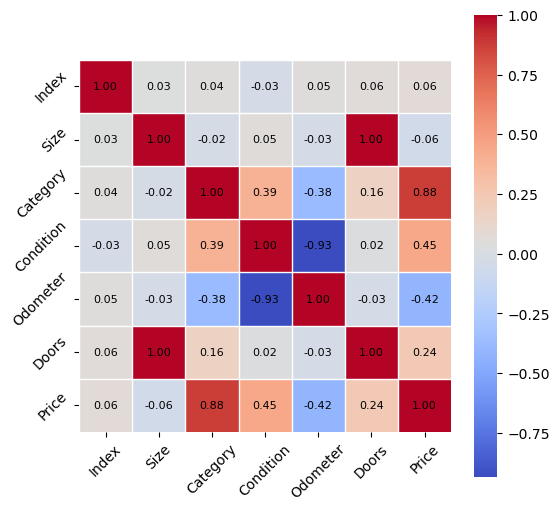

In [26]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix,cmap="coolwarm",square=True)
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = f"{correlation_matrix.iloc[i,j]:.2f}"
        plt.text(j+0.5,i+0.5,text,ha="center",va="center",fontsize=8)

for k in range(len(correlation_matrix)):
    plt.axhline(k,color="white",linewidth=1)
    plt.axvline(k,color="white",linewidth=1)
    
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

C:\Users\91950\AppData\Local\Temp\ipykernel_9416\303550742.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Category", y="Price", data=data, jitter=True, alpha=0.7, palette="viridis")
C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


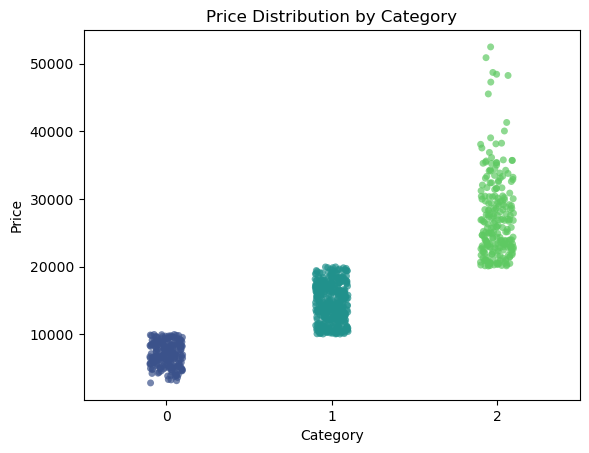

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with jitter for better separation of points
sns.stripplot(x="Category", y="Price", data=data, jitter=True, alpha=0.7, palette="viridis")

# Add title and labels
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")

# Show the plot
plt.show()


C:\Users\91950\AppData\Local\Temp\ipykernel_9416\3391263685.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Condition", y="Odometer", data=data, palette="viridis")
C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


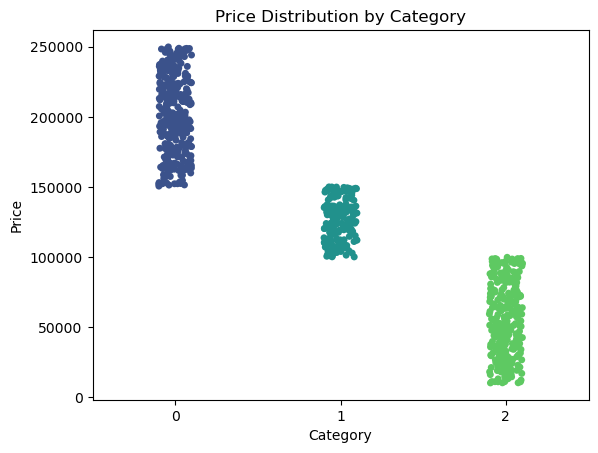

In [28]:
sns.stripplot(x="Condition", y="Odometer", data=data, palette="viridis")

# Add title and labels
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")

# Show the plot
plt.show()


In [29]:
data.groupby("Make")["Price"].mean()

Make
BMW       26371.571429
Honda     14707.211382
Nissan    13892.993902
Toyota    15954.523364
Name: Price, dtype: float64

C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


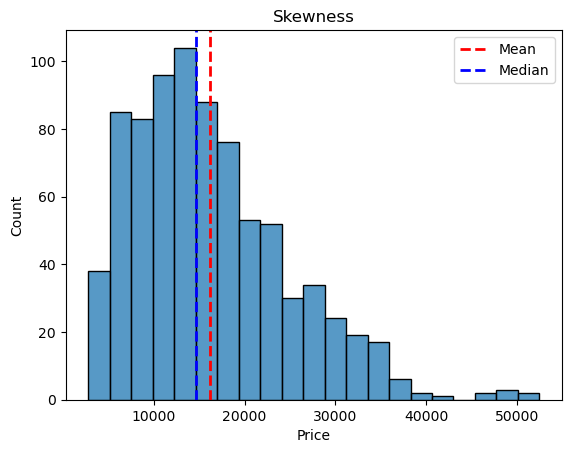

The data is Right Skewed


In [30]:
sns.histplot(data["Price"])
plt.axvline(data["Price"].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data["Price"].median(), color='b', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title("Skewness")

plt.show()
if data["Price"].mean()>data["Price"].median():
    print("The data is Right Skewed")
elif data["Price"].mean()<data["Price"].median():
    print("The data is left skewed")
else:
    print("The data has Normal Disribution")

In [31]:
Attributes = ["Make","Condition","Odometer","Price","Doors"]
data = data[Attributes]
data.head()

,Make,Condition,Odometer,Price,Doors
0,Honda,2,35431.0,15323,4
1,BMW,0,192714.0,19943,5
2,Honda,2,84714.0,28343,4
3,Toyota,0,154365.0,13434,4
4,Nissan,0,181577.0,14043,3


In [32]:
x=data.drop("Price",axis=1)
y=data["Price"]

In [33]:
x.head()

,Make,Condition,Odometer,Doors
0,Honda,2,35431.0,4
1,BMW,0,192714.0,5
2,Honda,2,84714.0,4
3,Toyota,0,154365.0,4
4,Nissan,0,181577.0,3


In [34]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_attribute = ["Make"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_attribute)],remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x = pd.DataFrame(transformed_x)
transformed_x.columns

RangeIndex(start=0, stop=7, step=1)

In [36]:
unique_makes = data["Make"].unique()
unique_makes

array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object)

In [37]:
actual_columns = ['Honda', 'BMW', 'Toyota', 'Nissan','Condition','Odometer','Doors']
actual_columns

['Honda', 'BMW', 'Toyota', 'Nissan', 'Condition', 'Odometer', 'Doors']

In [38]:
transformed_x.columns = actual_columns

In [39]:
transformed_x

,Honda,BMW,Toyota,Nissan,Condition,Odometer,Doors
0,0.0,1.0,0.0,0.0,2.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,2.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,181577.0,3.0
...,...,...,...,...,...,...,...
810,1.0,0.0,0.0,0.0,0.0,163322.0,3.0
811,0.0,0.0,0.0,1.0,2.0,35820.0,4.0
812,0.0,0.0,1.0,0.0,2.0,66604.0,4.0
813,0.0,1.0,0.0,0.0,0.0,215883.0,4.0


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [41]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
model.score(x_test,y_test)

0.2725142837652611

In [43]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
score = cross_val_score(model,transformed_x,y,cv=5)
final_score = score.mean()
print(f"The accuracy is : {final_score*100:.2f}%")

The accuracy is : 13.67%


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
model = RandomForestRegressor()
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100, 
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(x_train, y_train)
print(f"Best Hyperparameters: {random_search.best_params_}")
best_model = random_search.best_estimator_
score = best_model.score(x_test, y_test)
print(f"Best Model R^2 Score: {score}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\ensemble\_forest.py", line 417, in 

Best Hyperparameters: {'oob_score': False, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Model R^2 Score: 0.4106319460024094


In [45]:
test_score = random_search.best_estimator_.score(x_test, y_test)
print(f"Test R^2 Score: {test_score}")



Test R^2 Score: 0.4106319460024094


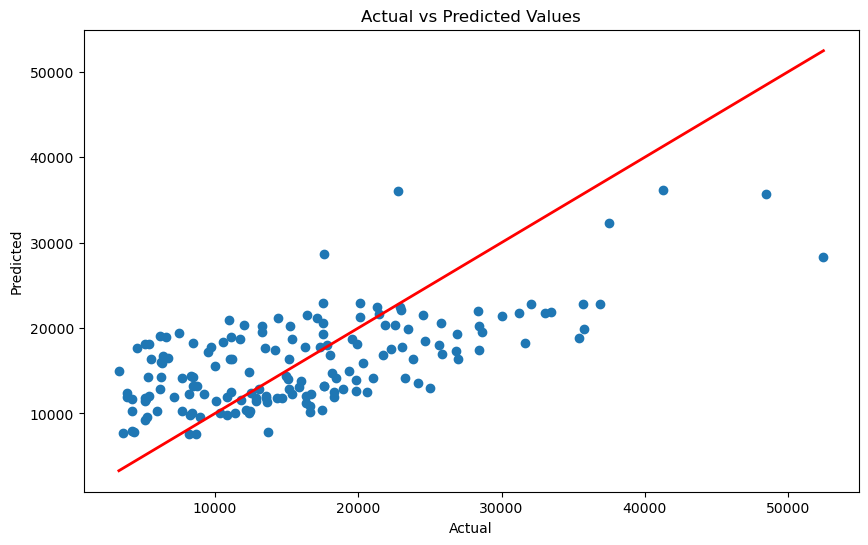

In [46]:
import matplotlib.pyplot as plt
y_pred = random_search.best_estimator_.predict(x_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


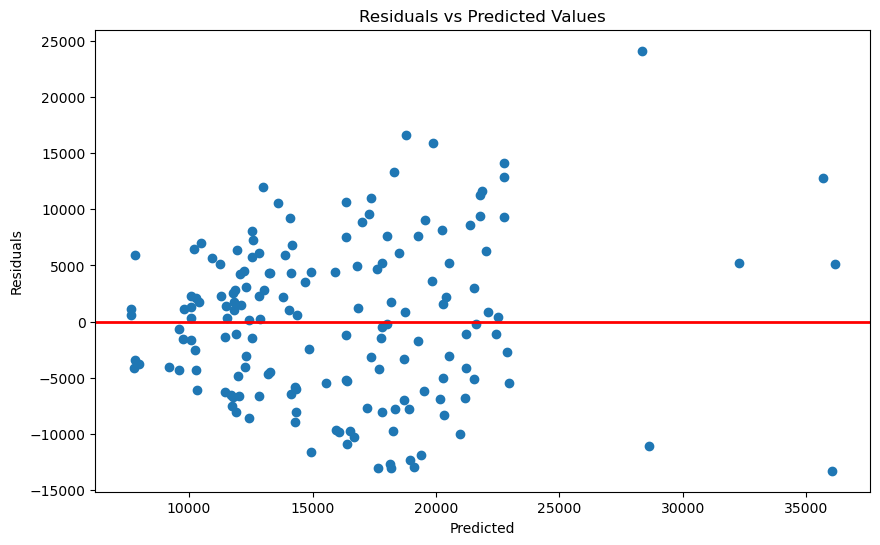

In [47]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


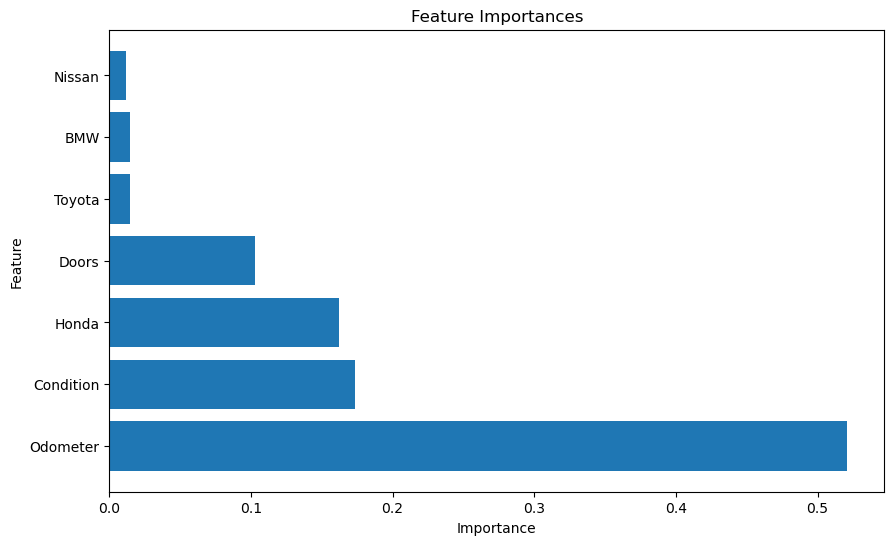

In [48]:
# Get feature importances
importances = random_search.best_estimator_.feature_importances_
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(x_train.columns[indices], importances[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [49]:
train_score = random_search.best_estimator_.score(x_train, y_train)
print(f"Train R^2 Score: {train_score}")
print(f"Test R^2 Score: {test_score}")

# If training score >> test score, consider regularization, increasing data, or reducing model complexity.


Train R^2 Score: 0.49571711747483793
Test R^2 Score: 0.4106319460024094


In [50]:
transformed_x.head(0)

,Honda,BMW,Toyota,Nissan,Condition,Odometer,Doors


In [51]:
import joblib

joblib.dump(best_model, r'C:\Users\91950\Desktop\car_price.pkl')


['C:\\Users\\91950\\Desktop\\car_price.pkl']

In [52]:
import joblib

# Load the saved model
car_prediction_model = joblib.load(r'C:\Users\91950\Desktop\car_price.pkl')


In [53]:
# New data (ensure it's preprocessed the same as the training data)
new_data = [[1, 0, 0, 0, 2, 25000, 4]]  # Example new data

# Make predictions
predictions = car_prediction_model.predict(new_data)
print(predictions)


[25988.9246618]


C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



size_mapping = {"Small":0,"Medium":1,"Expensive":2}
condition_mapping = {"Old":0,"Average":1,"Good":2}

In [54]:
new_data1 = [[0,0,0,1,1,250000,4]]
predictions = car_prediction_model.predict(new_data1)
print("A Nissan car with Good condition and medium category and has 250000 odometer reading and 4 doors can be a price of " ,"$",predictions)

A Nissan car with Good condition and medium category and has 250000 odometer reading and 4 doors can be a price of  $ [13074.35363837]


C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
